In [ ]:
from google.colab import files

uploaded = files.upload()


Saving olympics.csv to olympics (1).csv


---

# **EXPLORATORY DATA ANALYSIS (EDA)**





## **Problem statement 1:**
Given File 'olympics.csv'

In this case study, you are going to explore the Olympic dataset. But before you get insights from the dataset let's understand the dataset. To understand the dataset first read the dataset and print the dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset using pandas
data = pd.read_csv('olympics.csv')

# Print the shape of the dataset
print(data.shape)


(271116, 17)


##**Problem statement 2:**
Given File 'olympics.csv'

Describe the Age column of the dataset on various parameters using describe API.

In [ ]:
olympics = pd.read_csv('olympics.csv')

# Describe the 'Age' column
age_description = olympics['Age'].describe()

# Print the description
print(age_description)


count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


## **Problem statement 3:**
Given File 'olympics.csv'

Print the list of columns that have numeric datatypes.

Numeric datatypes include ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'].

Try to solve this problem with pandas and numpy.

In [ ]:
olympics = pd.read_csv('olympics.csv')

# Get columns with numeric data types using pandas and numpy
numeric_columns = olympics.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()

# Print the list of columns with numeric data types
print(numeric_columns)


['ID', 'Age', 'Height', 'Weight', 'Year']


## **Problem statement 4:**
Given File 'olympics.csv'

Print the columns that contain null values along with the count of null values present in each column.

In [ ]:
olympics = pd.read_csv('olympics.csv')

null_columns = olympics.columns[olympics.isnull().any()]
null_counts = olympics[null_columns].isnull().sum()

# Print columns with null values and their counts
for column, count in null_counts.items():
    print(f"{column} - {count} ")


Age - 9474 
Height - 60171 
Weight - 62875 
Medal - 231333 
Region - 136597 
Notes - 136597 


## **Problem statement 5:**
Given File 'olympics.csv'

In the previous column you analyzed the columns that contain any missing values.

You found out that Age, Height, Weight, Medal, region and notes columns contain null values.

Now you need to handle these missing values.

For the columns "Height, Weight and notes", you are going to drop these columns as they are not required in our further analysis.

For the "region" column, remove all the rows where the region column is having null values.

For output print the shape of the dataset after performing these operations.

Note: You are going to handle the Medal and Age column in the next questions.

In [ ]:
df = pd.read_csv('olympics.csv')

# Drop columns 'Height' and 'Weight'
df.drop(columns=['Height', 'Weight', 'Notes'], inplace=True)

df = df.dropna(subset=['Region'])

print(df.shape)

(134519, 14)


## **Problem statement 6:**
Given File 'olympics.csv'

In previous question you handled the missing values for the columns ["Height", "Weight", "notes", "region"].

Still there are missing values present in the "Medal" column. Now you don't need to drop the values present in this column because Medals have a NaN in about 2,31,333 rows. These can be explained since not all participating athletes would win medals.

Let's replace these missing values with 'DNW'. DNW means Did not win.

For the output print the unique number of values present in the Medal column.

In [ ]:
olympics = pd.read_csv('olympics.csv')

#####################################
olympics.drop(columns=["Notes", "Height", "Weight"], inplace=True)

olympics = olympics[pd.notnull(olympics['Region'])]
#####################################

# Replace missing values in the "Medal" column with 'DNW'
olympics['Medal'].fillna('DNW', inplace=True)

# Print the unique number of values present in the "Medal" column
medal_counts = olympics['Medal'].value_counts()
print(medal_counts)

DNW       115895
Bronze      6497
Silver      6302
Gold        5825
Name: Medal, dtype: int64





---


# **STATISTICAL ANALYSIS**

## **Problem statement 7:**
Given File 'olympics.csv'

You have an Age column that contains some null values. Rather than deleting them, fill these missing values by (means of the age of the players belonging to that particular game).

Example:

Let's suppose there is a missing value of Age where the sport is Swimming, then replace that missing value of age with the mean age of all the players who belong to Swimming. Similarly for all other sports.

After this print the mean of the Age column.

In [ ]:
data = pd.read_csv('olympics.csv')

mean_age_by_sport = data.groupby('Sport')['Age'].mean()

data['Age'] = data.apply(lambda row: mean_age_by_sport[row['Sport']] if pd.isnull(row['Age']) else row['Age'], axis=1)

overall_mean_age = data['Age'].mean()

print(round(overall_mean_age))


26


## **Problem statement 8:**
Calculate the probability distribution of the Age column.

Firstly plot the line chart to get the idea of the range of probability distribution and then print the maximum probability distribution in the range of 5.

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving olympics_cleaned.csv to olympics_cleaned.csv


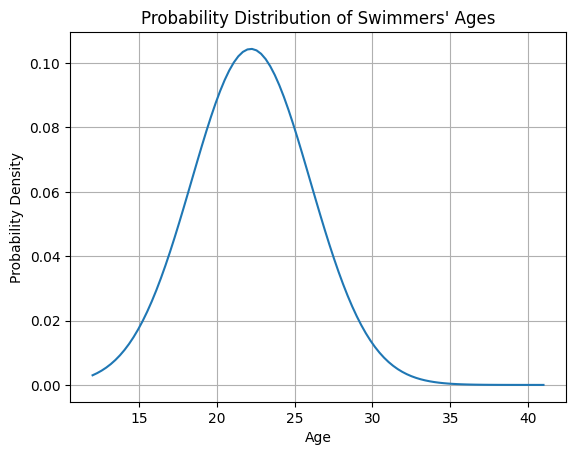

(0.10439820339629986, 22.252525252525253)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the data
olympics = pd.read_csv('olympics_cleaned.csv')

# Assuming 'Age' is the column that contains the age of the swimmers
# Filter the data for the sport of swimming and the years 2000-2016
swimming_data = olympics.loc[(olympics["Sport"] == "Swimming") &
                             (olympics["Year"] >= 2000) &
                             (olympics["Year"] <= 2016)]

# Get the 'Age' column, drop missing values and convert to a list
swimming_ages = swimming_data['Age'].dropna().tolist()

# Calculate the mean and standard deviation of the ages
mean_swimming_age = np.mean(swimming_ages)
std_swimming_age = np.std(swimming_ages)

# Generate the probability density function (PDF) for the ages
age_range = np.linspace(min(swimming_ages), max(swimming_ages), 100)
probability_pdf = norm.pdf(age_range, loc=mean_swimming_age, scale=std_swimming_age)

# Plot the distribution
plt.plot(age_range, probability_pdf)
plt.title('Probability Distribution of Swimmers\' Ages')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Find the maximum probability distribution in the range of 5

max_probability = np.max(probability_pdf)
max_probability_index = np.argmax(probability_pdf)
age_with_max_probability = age_range[max_probability_index]

# Print the age with the maximum distribution and the corresponding probability
max_probability, age_with_max_probability



## **Problem statement 9:**
Is the overall distribution of Gold Medals tally of India, left or negatively skewed?

In [ ]:
import scipy.stats as stats
olympics = pd.read_csv('olympics_cleaned.csv')
d = olympics
a = d[(d['region'] == 'India') & (d['Medal'] == 'Gold')]
val = a.groupby('Year')['Medal'].value_counts().values
val.sort()
mean = val.mean()
sd = val.std()

if stats.skew(val)>0:
    print('Right Skewed')
else:
    print('Left Skewed')


Left Skewed


## **Problem statement 10:**
What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)

In [ ]:
import statistics


olympics = pd.read_csv('olympics_cleaned.csv')

host = olympics.loc[(olympics['City']=="London") & (olympics['region']=="UK") & (olympics['Medal']=="Gold")]
a = host.groupby("Year")["Medal"].value_counts()

nothost = olympics.loc[(olympics['City']!="London") & (olympics['region']=="UK") & (olympics['Medal']=="Gold")]
b = nothost.groupby("Year")["Medal"].value_counts()

c = statistics.stdev(a)
d = statistics.stdev(b)

print(c)
print(d)

71.97453253292676
18.14528124684469


## **Problem statement 10:**
Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Filter data for participants in the Shooting Competition
shooting_participants = olympics[olympics['Sport'] == 'Shooting']

# Standardize the 'Age' column for shooting participants
standardized_age = (shooting_participants['Age'] - shooting_participants['Age'].mean()) / shooting_participants['Age'].std()

# Calculate mean and standard deviation of the standardized age data
mean_standardized_age = np.mean(standardized_age)
std_dev_standardized_age = np.std(standardized_age)

# Print the standardized mean and standard deviation
print(round(mean_standardized_age))
print(round(std_dev_standardized_age))

0
1


## **Problem statement 11:**
Is Age positively correlated or negatively correlated with winning the medal?

Print "Positive" if the correlation is positive and "Negative" if the correlation is negative.

In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Create a binary variable indicating whether a medal was won (1 for won, 0 for not won)
olympics['Medal_Won'] = olympics['Medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

# Calculate the correlation coefficient between 'Age' and 'Medal_Won'
correlation = olympics['Age'].corr(olympics['Medal_Won'])

# Determine if the correlation is positive or negative and print the result
if correlation > 0:
    print("Positive")
elif correlation < 0:
    print("Negative")
else:
    print("No correlation")

Positive


## **Problem statement 12:**
From the dataset, Calculate the IQR for the Age column.



In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

age_data = olympics['Age'].dropna()  # Drop NaN values for calculation
q1 = np.percentile(age_data, 25)  # 1st quartile (25th percentile)
q3 = np.percentile(age_data, 75)  # 3rd quartile (75th percentile)

# Calculate IQR as the difference between Q3 and Q1
iqr_value = q3 - q1

# Print the IQR value
print(iqr_value)

6.0




---

# **DATA VISUALIZATION**

## **Problem statement 13:**
In how many cities Olympics been held so far?

Also create a bar graph of the number of times cities hosted the Olympics.

42


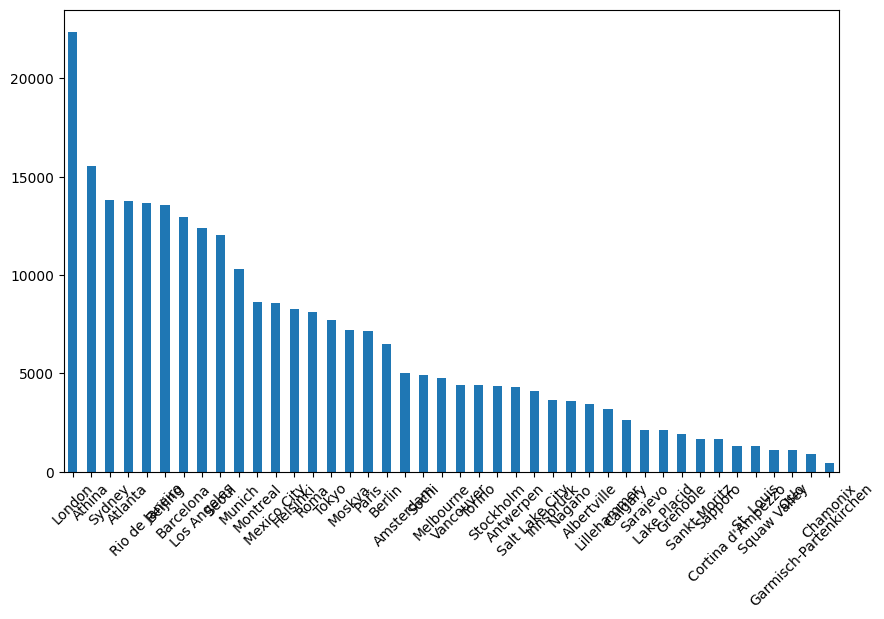

In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Count the number of unique cities where Olympics have been held
num_cities = len(olympics['City'].unique())

# Print the number of cities where Olympics have been held
print(num_cities)

# Create a bar graph showing the number of times each city hosted the Olympics
city_counts = olympics['City'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## **Problem statement 14:**
Which sport is having the most number of medals so far?

First plot the bar chart to find out the top 5 sports that have the most number of medals and then print the sport having the highest medals.

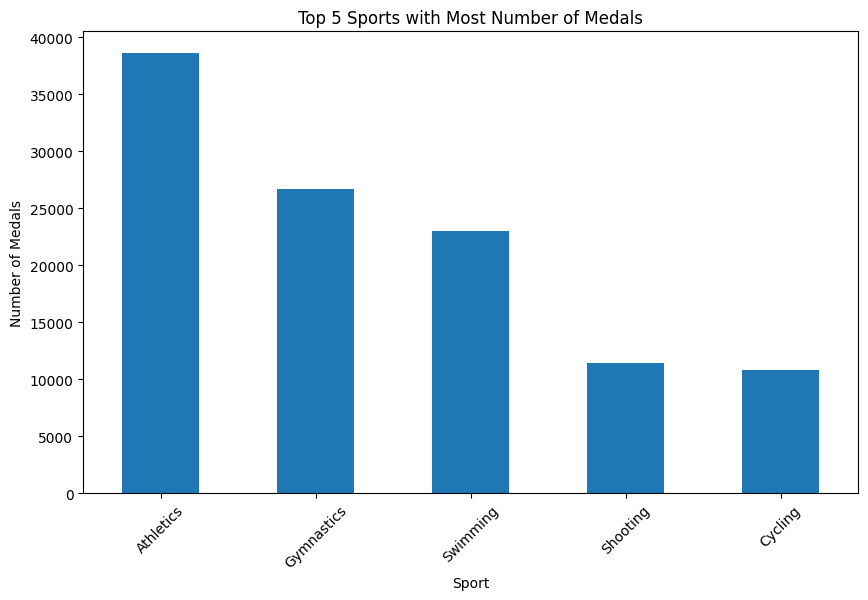

Athletics


In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Group the data by 'Sport' and count the number of medals for each sport
sport_medals_count = olympics.groupby('Sport')['Medal'].count().sort_values(ascending=False)

# Get the top 5 sports with the most number of medals
top_5_sports = sport_medals_count.head(5)

# Plot the bar chart for the top 5 sports
plt.figure(figsize=(10, 6))
top_5_sports.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.title('Top 5 Sports with Most Number of Medals')
plt.xticks(rotation=45)
plt.show()

# Get the sport with the most number of medals
sport_with_most_medals = top_5_sports.idxmax()

# Print the sport having the most medals
print(sport_with_most_medals)

## **Problem statement 15:**
In which year did India win the first Gold Medal in the Olympics?

Output Format

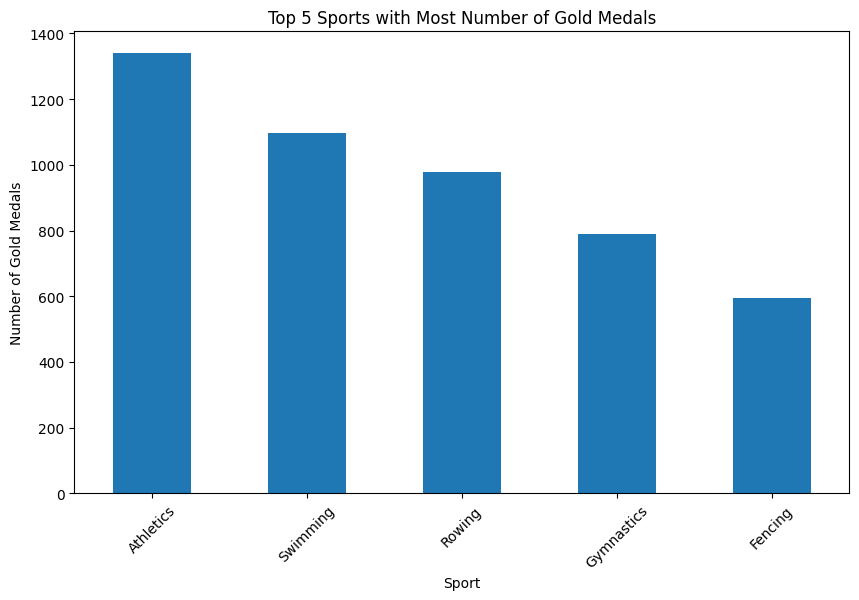

Athletics


In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Filter rows with Gold Medals
gold_medals = olympics[olympics['Medal'] == 'Gold']

# Group the data by 'Sport' and count the number of gold medals for each sport
sport_gold_medals_count = gold_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)

# Get the top 5 sports with the most number of gold medals
top_5_gold_sports = sport_gold_medals_count.head(5)

# Plot the bar chart for the top 5 sports with most gold medals
plt.figure(figsize=(10, 6))
top_5_gold_sports.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.title('Top 5 Sports with Most Number of Gold Medals')
plt.xticks(rotation=45)
plt.show()

# Get the sport with the most number of gold medals
sport_with_most_gold_medals = top_5_gold_sports.idxmax()

# Print the sports having the most number of gold medals
print(sport_with_most_gold_medals)


## **Problem statement 16:**
In which year did India win the first Gold Medal in the Olympics?

In [ ]:

olympics = pd.read_csv('olympics_cleaned.csv')

# Filter rows where the country is India and the medal is Gold
india_gold_medals = olympics[(olympics['NOC'] == 'IND') & (olympics['Medal'] == 'Gold')]

# Sort the data by year and get the first row
first_gold_medal_year = india_gold_medals.sort_values(by='Year').iloc[0]['Year']

# Print the year in which India won its first gold medal
print(first_gold_medal_year)

1924


## **Problem statement 17:**
Which event is most popular in terms of the number of players?

First plot the bar chart to find out the top 5 sports that have the most number of participants and then print the sport having the highest number of players participating.

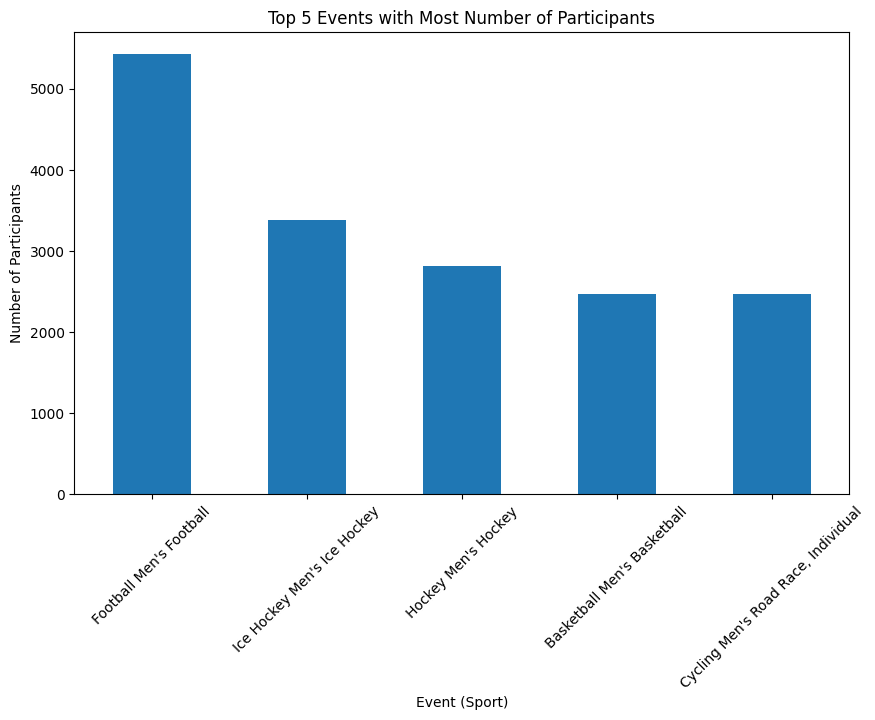

Football Men's Football


In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Group the data by 'Event' (sport) and count the number of unique players for each event
event_participants_count = olympics.groupby('Event')['ID'].nunique().sort_values(ascending=False)

# Get the top 5 events with the most number of participants
top_5_events = event_participants_count.head(5)

# Plot the bar chart for the top 5 events with most participants
plt.figure(figsize=(10, 6))
top_5_events.plot(kind='bar')
plt.xlabel('Event (Sport)')
plt.ylabel('Number of Participants')
plt.title('Top 5 Events with Most Number of Participants')
plt.xticks(rotation=45)
plt.show()

# Get the event with the most number of participants
event_with_most_participants = top_5_events.idxmax()

# Print the event in which most players participate
print(event_with_most_participants)


## **Problem statement 18:**
Which sport is having the most female Gold Medalists?

First plot the bar chart to find out the top 5 sports that have the most female Gold Medalists and then print the sport having the most female Gold Medalists.

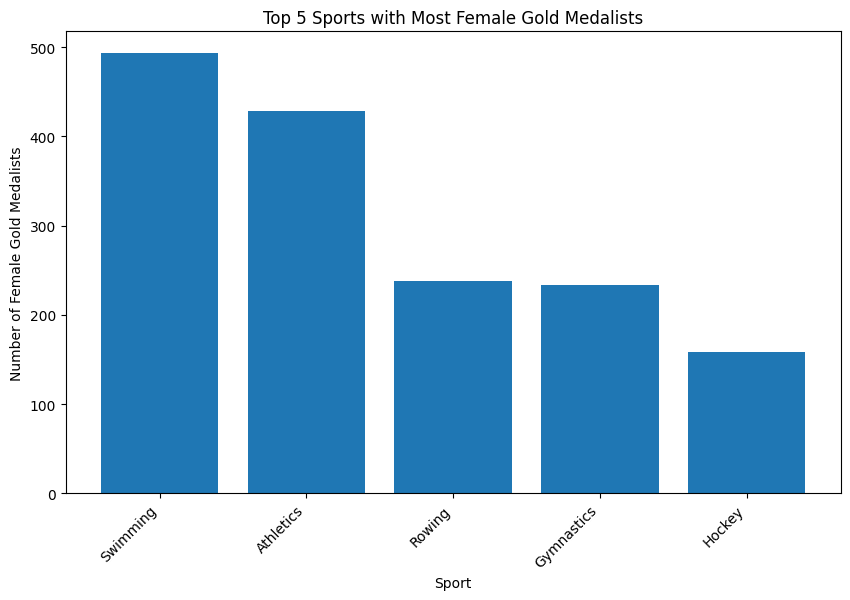

Swimming


In [ ]:
olympics = pd.read_csv('olympics_cleaned.csv')

# Filter rows for female gold medalists
female_gold_medalists = olympics[(olympics['Sex'] == 'F') & (olympics['Medal'] == 'Gold')]

# Group by sport and count the number of gold medals
female_gold_medals_by_sport = female_gold_medalists.groupby('Sport')['Medal'].count().reset_index()

# Sort and get the top 5 sports with the most female gold medalists
top_female_gold_sports = female_gold_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)

# Plot a bar chart for the top 5 sports
plt.figure(figsize=(10, 6))
plt.bar(top_female_gold_sports['Sport'], top_female_gold_sports['Medal'])
plt.xlabel('Sport')
plt.ylabel('Number of Female Gold Medalists')
plt.title('Top 5 Sports with Most Female Gold Medalists')
plt.xticks(rotation=45, ha='right')
plt.show()

# Get the sport with the most female gold medalists
most_female_gold_sport = top_female_gold_sports.iloc[0]['Sport']
print(most_female_gold_sport)
